In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/supermarket_sales.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


2. Sales per City

We can visualize the total sales made in each city.

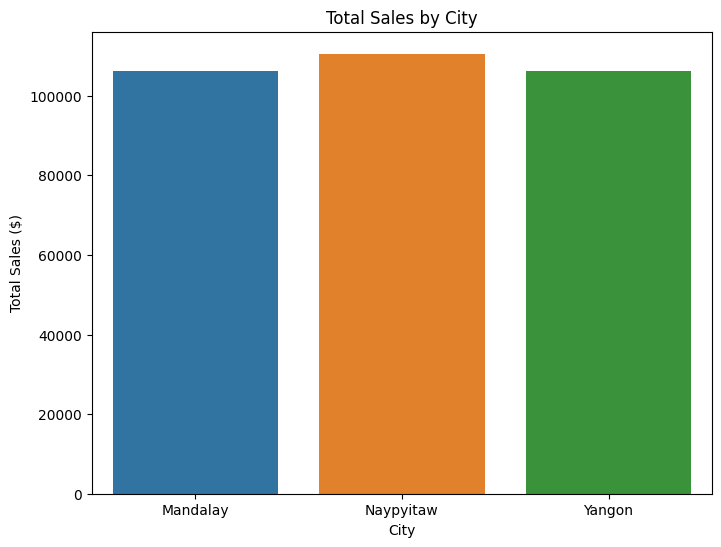

In [7]:
# Group data by City and sum the Total sales
city_sales = df.groupby('City')['Total'].sum().reset_index()

# Bar plot of sales by city
plt.figure(figsize=(8, 6))
sns.barplot(x='City', y='Total', data=city_sales)
plt.title('Total Sales by City')
plt.ylabel('Total Sales ($)')
plt.xlabel('City')
plt.show()

3. Sales by Product Line

We can analyze which product lines generate the most revenue.

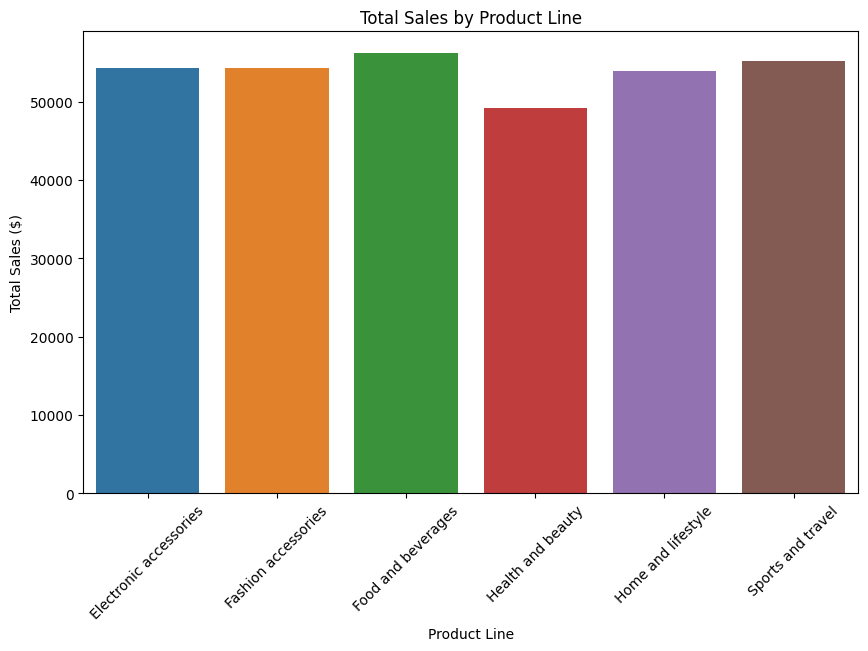

In [8]:
# Group by product line and sum total sales
product_sales = df.groupby('Product line')['Total'].sum().reset_index()

# Bar plot of total sales by product line
plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Total', data=product_sales)
plt.title('Total Sales by Product Line')
plt.ylabel('Total Sales ($)')
plt.xlabel('Product Line')
plt.xticks(rotation=45)
plt.show()

4. Sales by Customer Type

Let's compare how much sales come from Member and Normal customers.

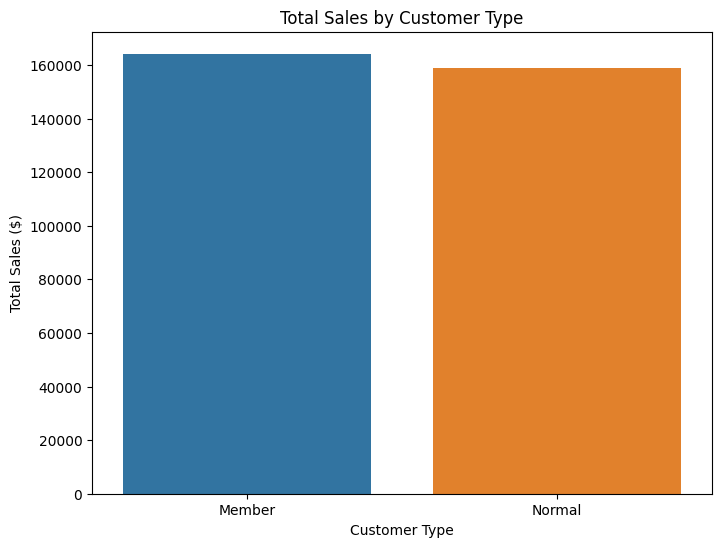

In [9]:
# Group by customer type and sum total sales
customer_sales = df.groupby('Customer type')['Total'].sum().reset_index()

# Bar plot of total sales by customer type
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer type', y='Total', data=customer_sales)
plt.title('Total Sales by Customer Type')
plt.ylabel('Total Sales ($)')
plt.xlabel('Customer Type')
plt.show()

5. Gender-Based Analysis

We can compare purchases made by male and female customers.

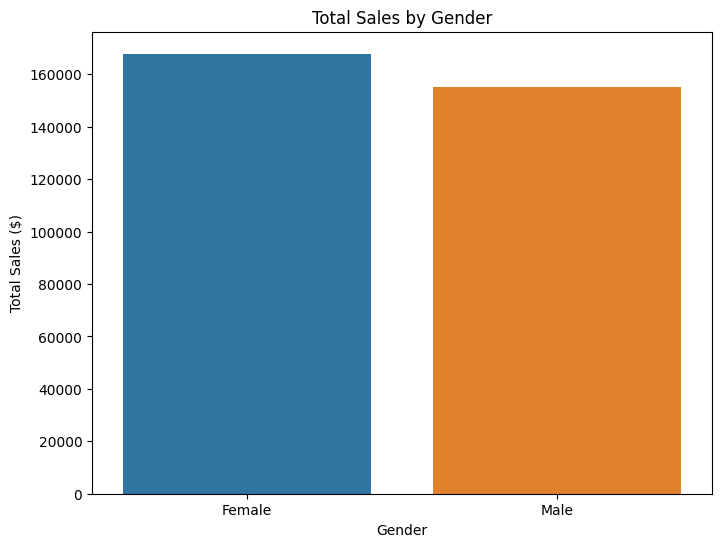

In [10]:
# Group by gender and sum total sales
gender_sales = df.groupby('Gender')['Total'].sum().reset_index()

# Bar plot of total sales by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Total', data=gender_sales)
plt.title('Total Sales by Gender')
plt.ylabel('Total Sales ($)')
plt.xlabel('Gender')
plt.show()

6. Sales Over Time

We can analyze sales patterns based on time (hours) and days.

C:\Users\PC\AppData\Local\Temp\ipykernel_7044\729363151.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


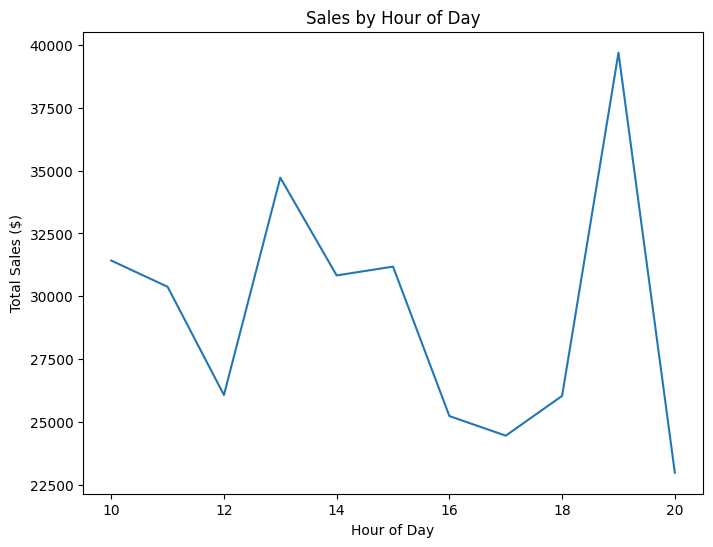

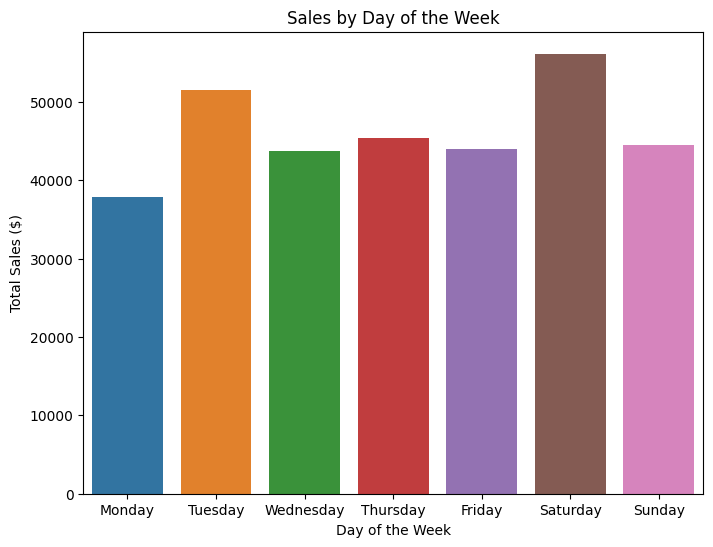

In [11]:
# Extract hour from Time and day from Date
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

# Sales by hour of the day
hourly_sales = df.groupby('Hour')['Total'].sum().reset_index()

# Line plot of sales by hour
plt.figure(figsize=(8, 6))
sns.lineplot(x='Hour', y='Total', data=hourly_sales)
plt.title('Sales by Hour of Day')
plt.ylabel('Total Sales ($)')
plt.xlabel('Hour of Day')
plt.show()

# Sales by day of the week
df['Day of Week'] = df['Date'].dt.day_name()
daily_sales = df.groupby('Day of Week')['Total'].sum().reset_index()

# Bar plot of sales by day of the week
plt.figure(figsize=(8, 6))
sns.barplot(x='Day of Week', y='Total', data=daily_sales, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sales by Day of the Week')
plt.ylabel('Total Sales ($)')
plt.xlabel('Day of the Week')
plt.show()

7. Payment Method Popularity

Analyze which payment method is used most frequently.

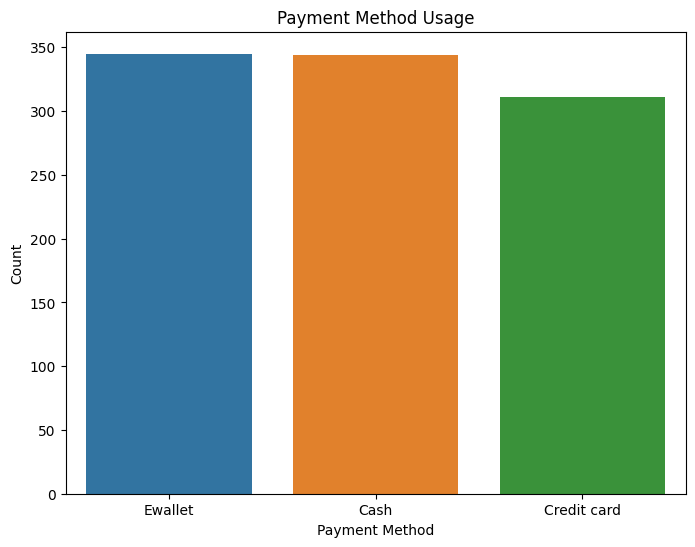

In [12]:
# Group by payment method and count occurrences
payment_count = df['Payment'].value_counts().reset_index()

# Rename the columns to make them explicit
payment_count.columns = ['Payment Method', 'Count']

# Bar plot of payment method usage
plt.figure(figsize=(8, 6))
sns.barplot(x='Payment Method', y='Count', data=payment_count)
plt.title('Payment Method Usage')
plt.ylabel('Count')
plt.xlabel('Payment Method')
plt.show()


8. Correlation Heatmap

Understanding the relationships between numerical features (e.g., Unit price, Quantity, Total, gross income, Rating) helps analyze what impacts sales and profits the most.

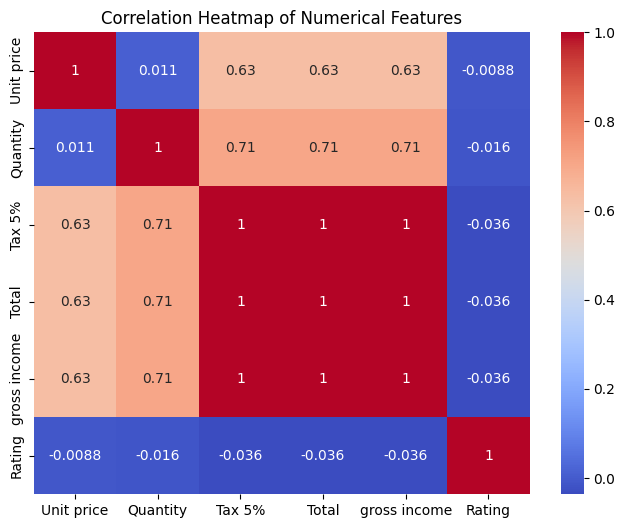

In [13]:
# Select relevant numeric columns
corr_data = df[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'gross income', 'Rating']]

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

9. Box Plot for Sales by Product Line

A box plot can be useful to see the distribution of total sales per product line.

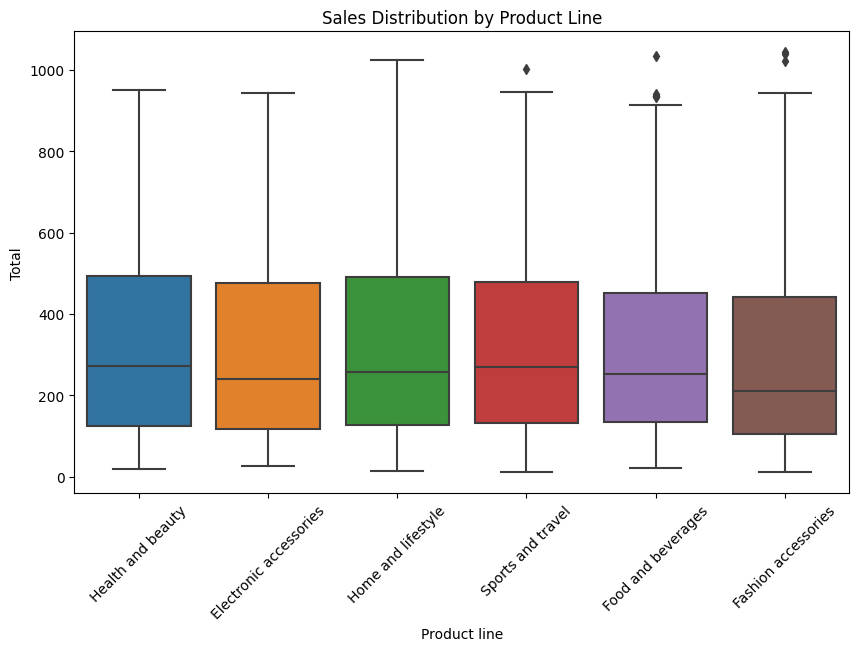

In [14]:
# Box plot for total sales by product line
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product line', y='Total', data=df)
plt.title('Sales Distribution by Product Line')
plt.xticks(rotation=45)
plt.show()
